In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
df.shape

(54808, 14)

In [14]:
df.groupby('is_promoted').size()


is_promoted
0    50140
1     4668
dtype: int64

In [32]:
#14 Variables/Columns
#54,808 observations
#2 varibales have missing values - education (2409) and previous_year_rating (4124)
#5 non-numeric variables (objects)
#9 numeric variables
#Clearly our target class is imbalanced with "not recommended for promotion" being dominant(91.4%) against only (8.5%) "getting recommendation for promotion"

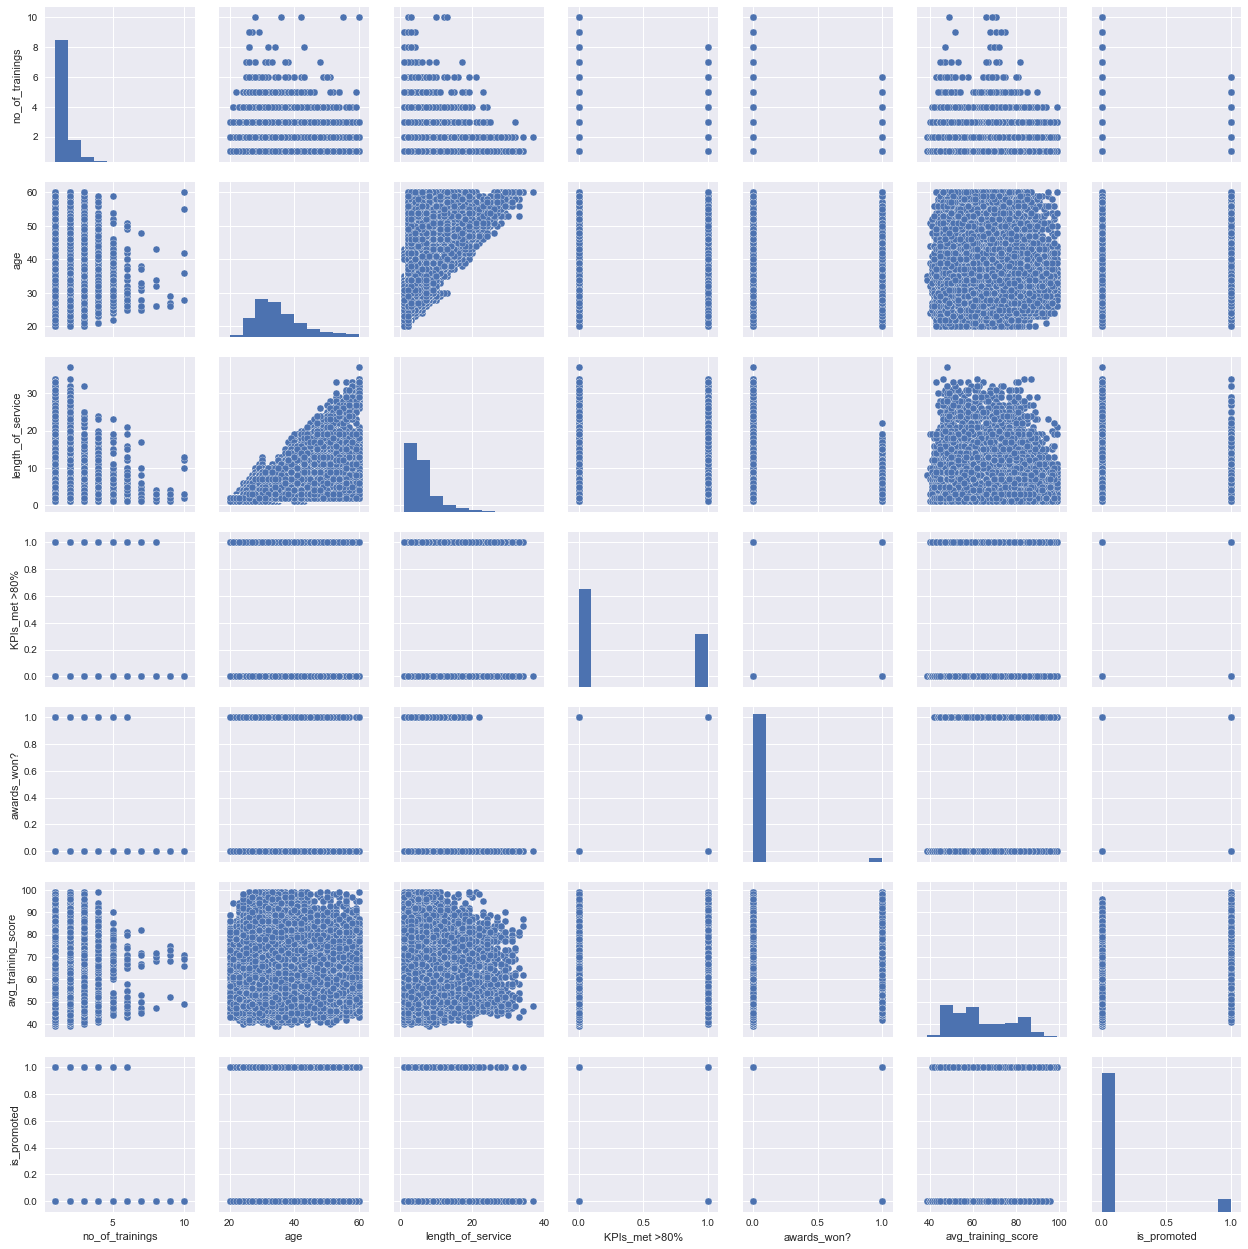

In [81]:
col_study = ['no_of_trainings', 'age', 
            'length_of_service', 'KPIs_met >80%', 'awards_won?',
            'avg_training_score', 'is_promoted']
#df[col_study].isnull().any()
sns.pairplot(df[col_study]);
plt.show()

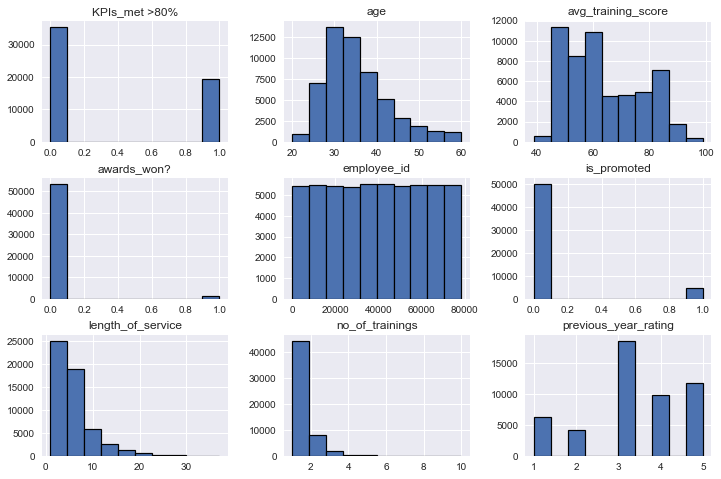

In [54]:
# Index(['employee_id', 'department', 'region', 'education', 'gender',
#        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
#        'length_of_service', 'KPIs_met >80%', 'awards_won?',
#        'avg_training_score', 'is_promoted'],
#       dtype='object')
#sns.pairplot(df,hue='is_promoted')
df.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));
plt.show();


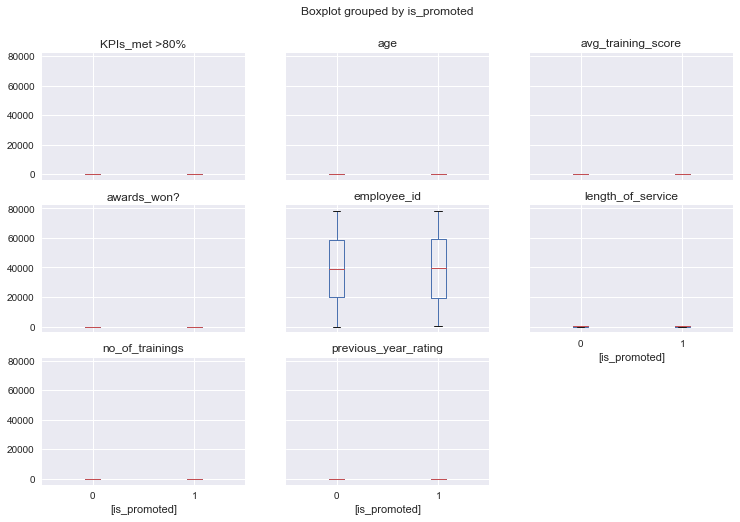

In [56]:
df.boxplot(by='is_promoted', figsize=(12,8));

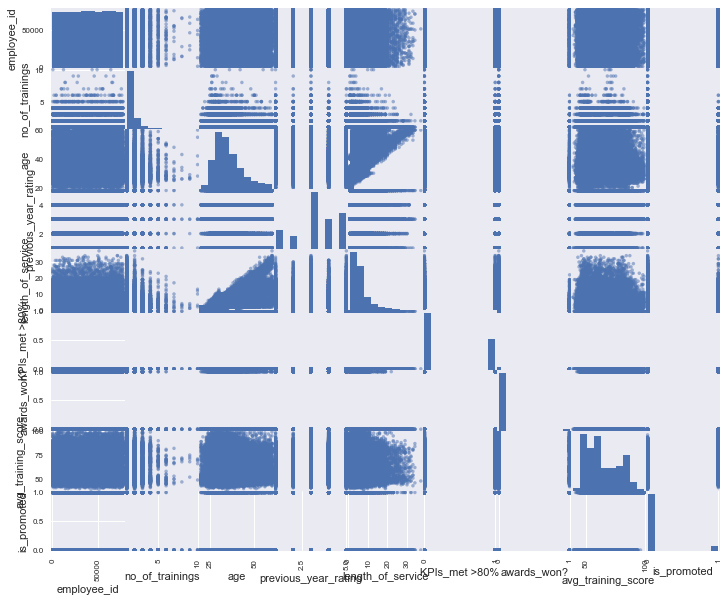

In [57]:
pd.plotting.scatter_matrix(df, figsize=(12,10))
plt.show();

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


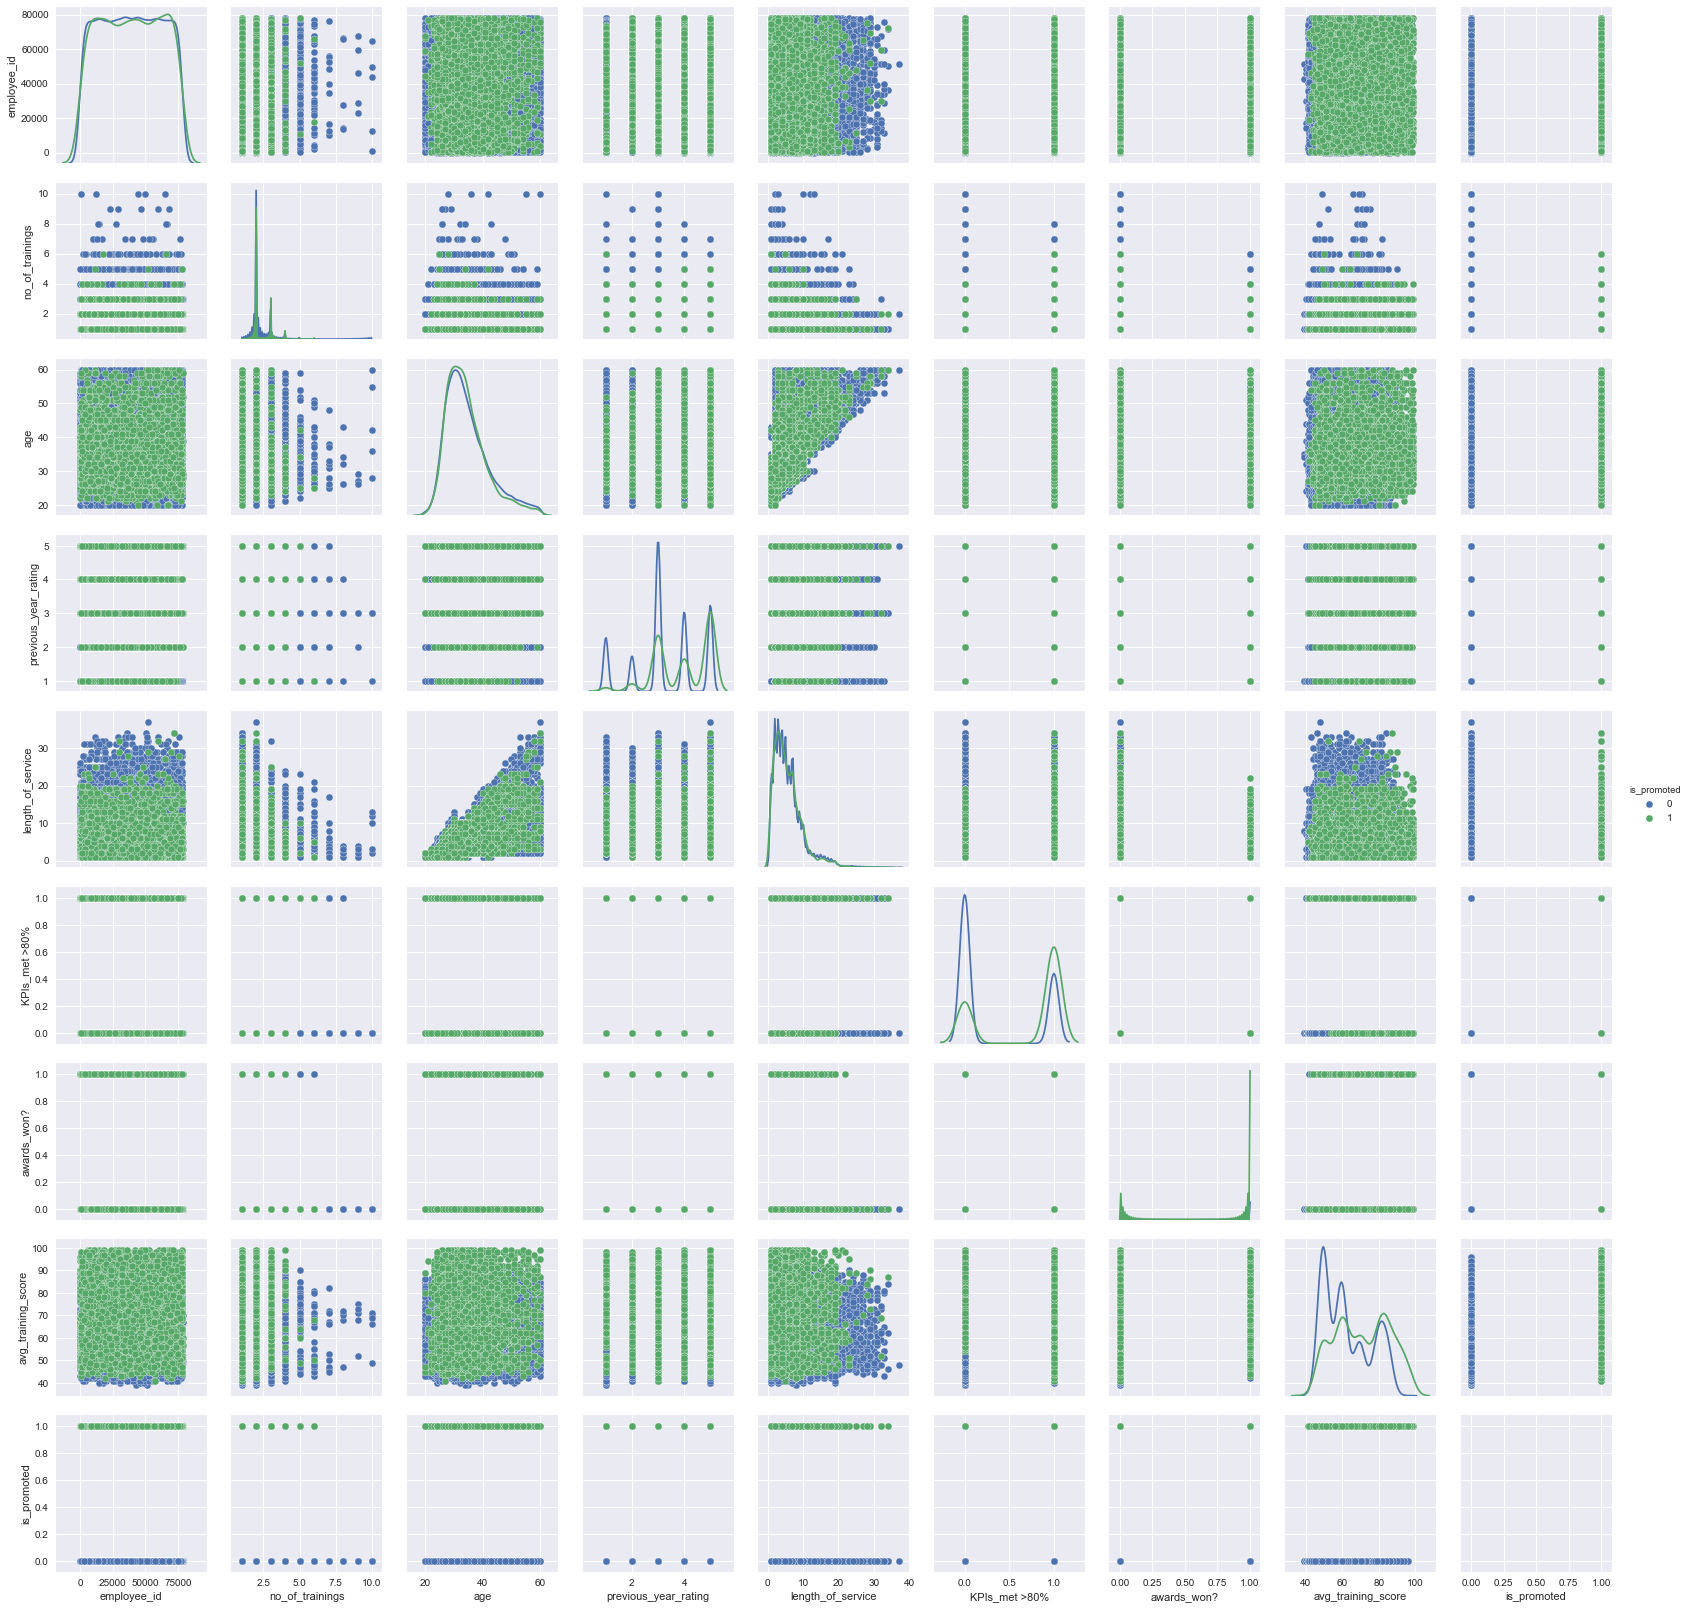

In [58]:
sns.pairplot(df, hue="is_promoted",diag_kind="kde");

In [59]:
#Correlation Analysis
pd.options.display.float_format = '{:,.3f}'.format
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000,-0.005,0.000,0.005,0.001,-0.003,0.008,-0.001,0.001
no_of_trainings,-0.005,1.000,-0.081,-0.063,-0.057,-0.046,-0.008,0.043,-0.025
age,0.000,-0.081,1.000,0.006,0.657,-0.026,-0.008,-0.048,-0.017
previous_year_rating,0.005,-0.063,0.006,1.000,0.000,0.352,0.028,0.075,0.159
length_of_service,0.001,-0.057,0.657,0.000,1.000,-0.078,-0.040,-0.038,-0.011
KPIs_met >80%,-0.003,-0.046,-0.026,0.352,-0.078,1.000,0.097,0.078,0.222
awards_won?,0.008,-0.008,-0.008,0.028,-0.040,0.097,1.000,0.072,0.196
avg_training_score,-0.001,0.043,-0.048,0.075,-0.038,0.078,0.072,1.000,0.181
is_promoted,0.001,-0.025,-0.017,0.159,-0.011,0.222,0.196,0.181,1.000


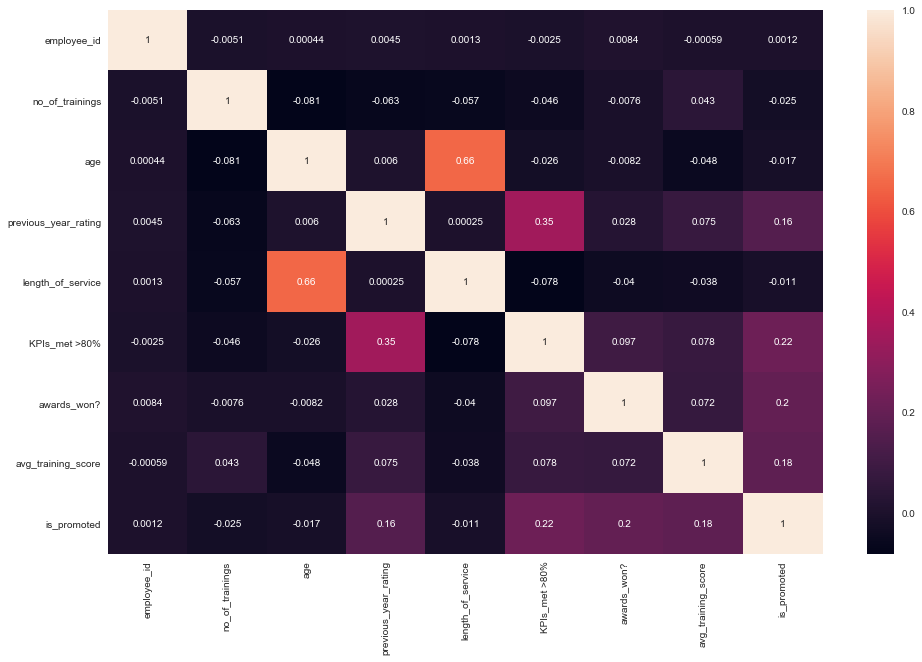

In [60]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [66]:
X = df['age'].values.reshape(-1,1)
y = df['length_of_service'].values

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
model.coef_

array([0.36587206])

In [69]:
model.intercept_

-6.868268074905792

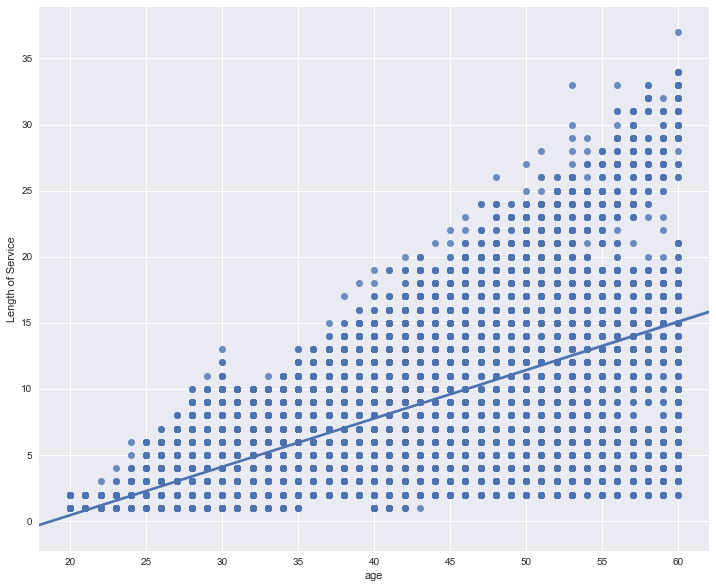

In [70]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('age')
plt.ylabel("Length of Service")
plt.show();

In [71]:
# As logical, there has to be a strong poistive correlation between the 2 variables. So, as age increases, length of Service also increases

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


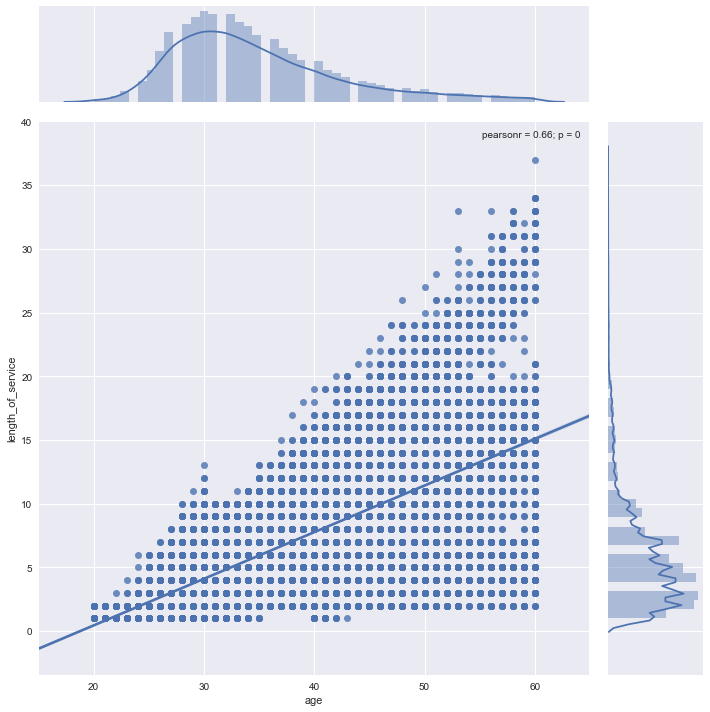

In [72]:
sns.jointplot(x='age', y='length_of_service', data=df, kind='reg', size=10);
plt.show();

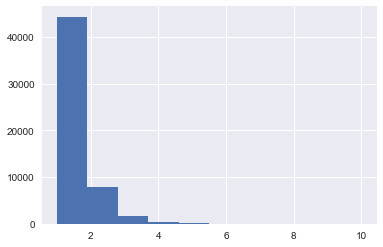

In [83]:
# Index(['employee_id', 'department', 'region', 'education', 'gender',
#        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
#        'length_of_service', 'KPIs_met >80%', 'awards_won?',
#        'avg_training_score', 'is_promoted'],
#       dtype='object')

df['no_of_trainings'].hist();

In [84]:
#People taking >=2 trainings are less in number. Max have taken 1 training only
df['no_of_trainings'].mean()

1.253010509414684

In [86]:
df['no_of_trainings'].median()

1.0

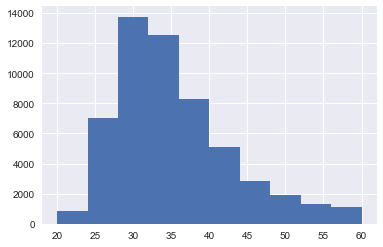

In [87]:
# Index(['employee_id', 'department', 'region', 'education', 'gender',
#        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
#        'length_of_service', 'KPIs_met >80%', 'awards_won?',
#        'avg_training_score', 'is_promoted'],
#       dtype='object')
df['age'].hist();

In [88]:
# Histogram has a positive Skew with mean centering ~around 35
df['age'].mean()

34.80391548679025

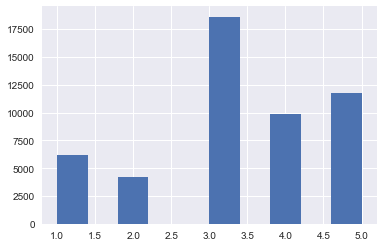

In [89]:
df['previous_year_rating'].hist();

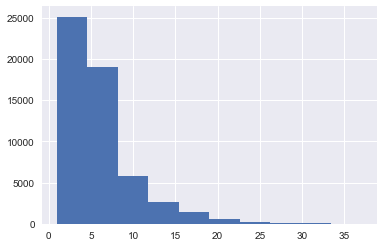

In [90]:
# As expected, max 3 raters

# Index(['employee_id', 'department', 'region', 'education', 'gender',
#        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
#        'length_of_service', 'KPIs_met >80%', 'awards_won?',
#        'avg_training_score', 'is_promoted'],
#       dtype='object')
df['length_of_service'].hist();

In [91]:
#Positive Skewed, again as expected
df['length_of_service'].mean()

5.865512333965844

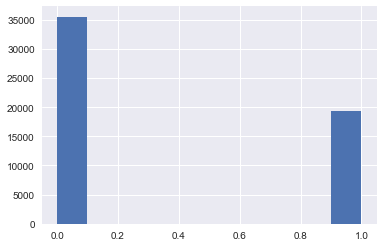

In [92]:
df['KPIs_met >80%'].hist();

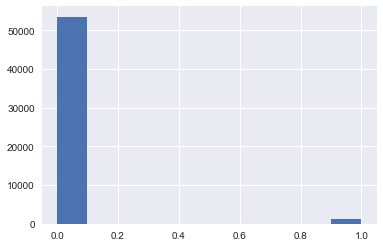

In [93]:
#only little less than half have met their KPI's

# Index(['employee_id', 'department', 'region', 'education', 'gender',
#        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
#        'length_of_service', 'KPIs_met >80%', 'awards_won?',
#        'avg_training_score', 'is_promoted'],
#       dtype='object')
df['awards_won?'].hist();

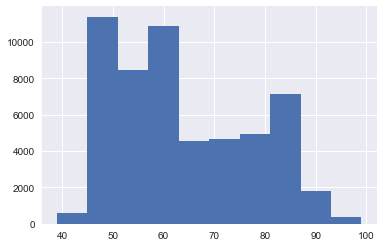

In [95]:
# Extremely low # of people have got awards

df['avg_training_score'].hist();

In [96]:
df.mean(axis=0)

employee_id            39,195.831
no_of_trainings             1.253
age                        34.804
previous_year_rating        3.329
length_of_service           5.866
KPIs_met >80%               0.352
awards_won?                 0.023
avg_training_score         63.387
is_promoted                 0.085
dtype: float64